<a href="https://colab.research.google.com/github/athernoor96-Aa/adult-dataset.csv/blob/main/Linear_Regression_Model_for_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Linear Regression
You should build a machine learning pipeline using a linear regression model. In particular, you should do the following:

Load the housing dataset using Pandas. You can find this dataset in the datasets folder.
Split the dataset into training and test sets using Scikit-Learn.
Conduct data exploration, data preprocessing, and feature engineering if necessary.
Train and test a linear regression model using Scikit-Learn.
Check the documentation to identify the most important hyperparameters, attributes, and methods of the model. Use them in practice.

## Importing libraries

In [ ]:
import pandas as pd

### Data Collection

In [ ]:
import pandas as pd
import sklearn.model_selection # for train and split the data
import sklearn.compose
import seaborn as sns
import matplotlib.pyplot as plt

## Load the house datasets

In [ ]:
data = pd.read_csv ("https://raw.githubusercontent.com/m-mahdavi/teaching/refs/heads/main/datasets/housing.csv")
data.head() # to preview the data

,id,price,area,bedrooms,bathrooms,stories,stories.1,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1.0
1,1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1.0
2,2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0.5
3,3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1.0
4,4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1.0


## Data Exploration

**Inspect** the full dataset (EDA)

In [ ]:
data.shape # Dataset size
data.info() # Column names & data types
data.describe() # Summary statistics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                545 non-null    int64  
 1   price             545 non-null    int64  
 2   area              545 non-null    int64  
 3   bedrooms          545 non-null    int64  
 4   bathrooms         545 non-null    int64  
 5   stories           545 non-null    int64  
 6   stories.1         545 non-null    int64  
 7   guestroom         545 non-null    int64  
 8   basement          545 non-null    int64  
 9   hotwaterheating   545 non-null    int64  
 10  airconditioning   545 non-null    int64  
 11  parking           545 non-null    int64  
 12  prefarea          545 non-null    int64  
 13  furnishingstatus  545 non-null    float64
dtypes: float64(1), int64(13)
memory usage: 59.7 KB


,id,price,area,bedrooms,bathrooms,stories,stories.1,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,545.00000,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,272.00000,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,0.465138
std,157.47222,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.380686
min,0.00000,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,136.00000,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,272.00000,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
75%,408.00000,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,544.00000,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000


In [ ]:
data.columns # feature names

Index(['id', 'price', 'area', 'bedrooms', 'bathrooms', 'stories', 'stories.1',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [ ]:
data.isnull().sum() # Check missing values

,0
id,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
stories.1,0
guestroom,0
basement,0
hotwaterheating,0


## Exploratory Data Analysis for House Price Prediction

#### The pairplot visualizes linear relationships, highlights potential outliers, and helps assess the suitability of key features for linear regression in house price prediction.

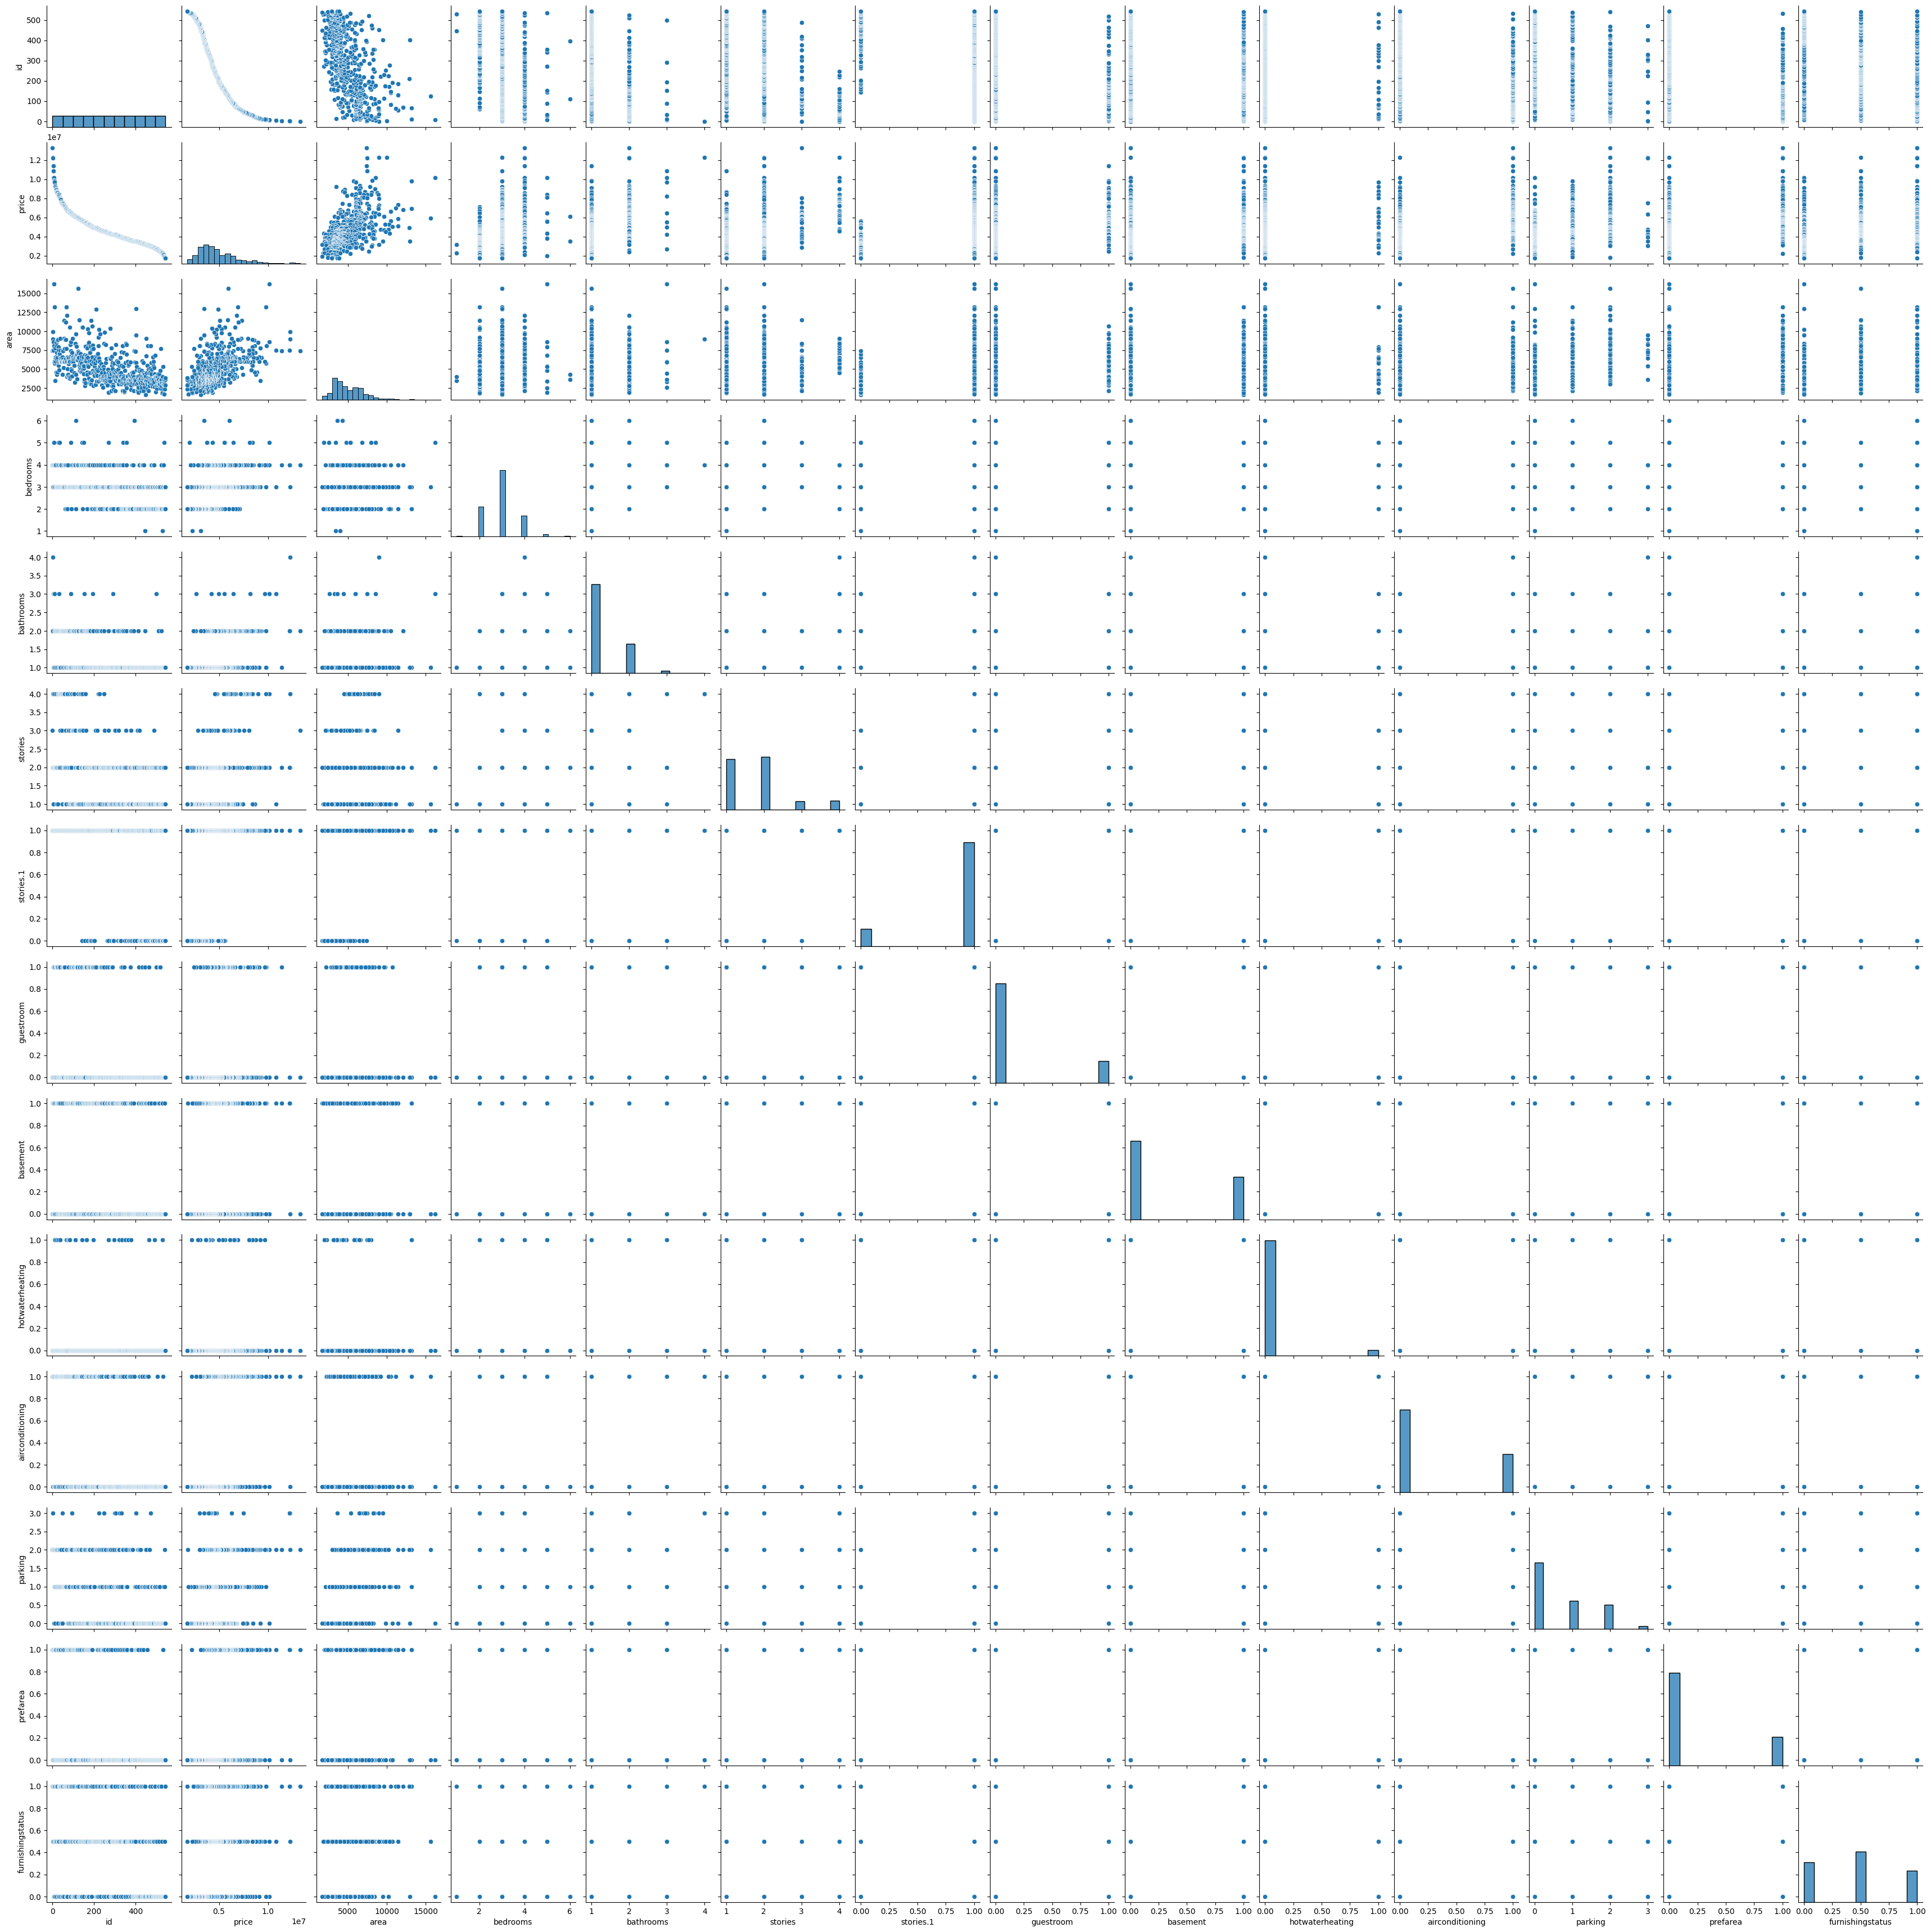

In [ ]:
sns.pairplot(data)
plt.show()

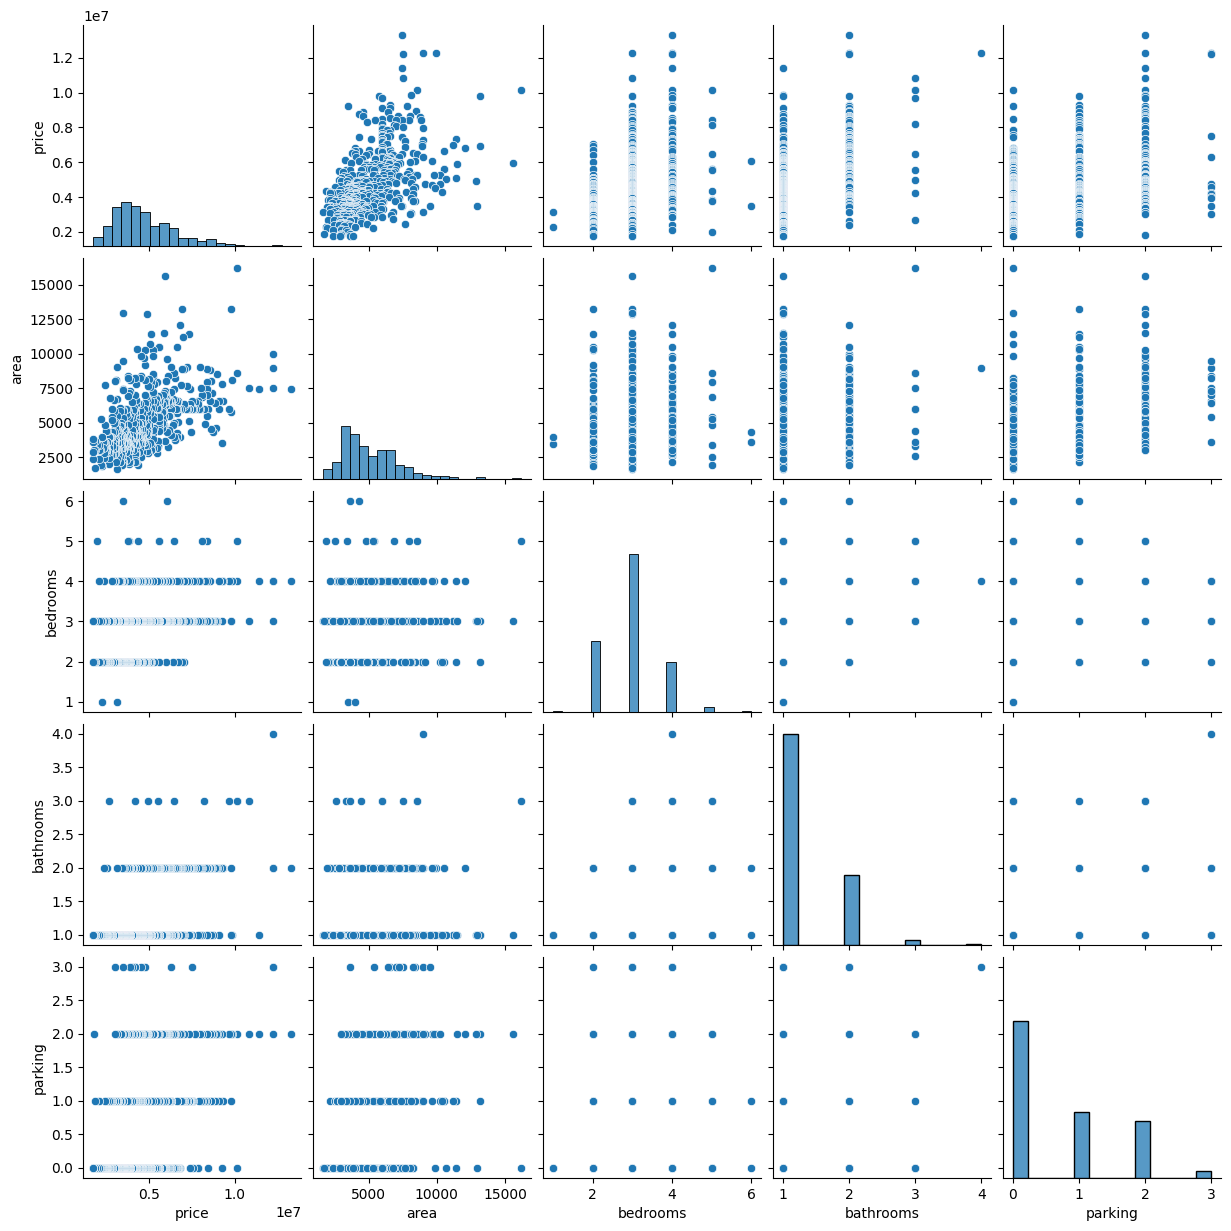

In [ ]:
important_features = ['price', 'area', 'bedrooms', 'bathrooms', 'parking']
sns.pairplot(data[important_features])
plt.show()

## Correlation Heatmap

####The correlation heatmap shows the strength and direction of relationships between features and house price, helping identify the most influential predictors and detect multicollinearity.



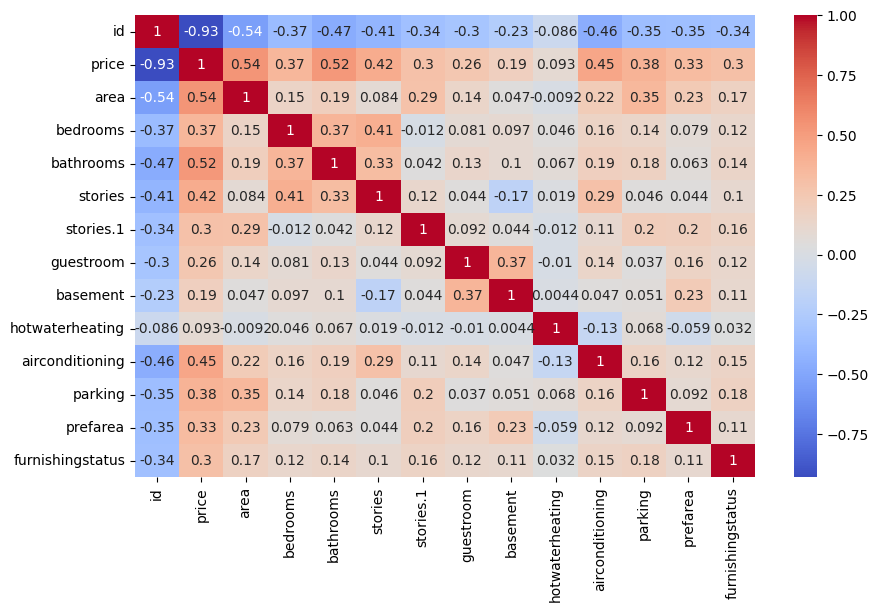

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

#### During the exploratory data analysis phase, I used pair plots to visualize relationships between house price and key numerical features such as area, bedrooms, and bathrooms. This helped identify linear trends, correlations, and potential outliers relevant for linear regression.


*   Positive correlation between area and price
*   Effect of bedrooms / bathrooms on price
*   Potential outliers
*   Whether linear regression is suitable

## Feature Selection & Target Variable Definition

Based on EDA insights, separate the target variable (price) from the input features and select relevant predictors that show meaningful correlation with house prices.



> Helps the model learn from the right data, predict more accurately, and remain easy to interpret.



In [ ]:
# Define target variable
y = data['price']

# Select input features (excluding target)
X = data.drop('price', axis=1)

# View feature and target shapes
print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (545, 13)
Target shape: (545,)


### Train–Test Split

Split the dataset into training and testing sets to evaluate the model’s generalization ability on unseen data.



> A test size of 20% is used to maintain a balance between training data and evaluation data, while random_state = 42 ensures reproducibility by producing the same train–test split across multiple runs.



In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

# Check the shapes of the splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (436, 13)
X_test shape: (109, 13)
y_train shape: (436,)
y_test shape: (109,)


### Data Preprocessing

The housing dataset contains both numerical and categorical features. Linear Regression requires numerical input, and features should be on a comparable scale.
Therefore, preprocessing is applied to prepare the data correctly before model training.


1.   StandardScaler → scales numerical features
2.   OneHotEncoder → converts categorical variables into numeric format.
3.   ColumnTransformer → applies different transformations to different feature types.

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Identify numerical and categorical columns
num_features = X.select_dtypes(include=['int64', 'float64']).columns
cat_features = X.select_dtypes(include=['object']).columns

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(drop='first'), cat_features)
    ]
)

In this step, data preprocessing was performed to prepare the dataset for linear regression. Numerical features were standardized to ensure equal contribution to the model, while categorical features were encoded using one-hot encoding. A ColumnTransformer was used to apply these transformations efficiently and consistently across feature types.



> Data preprocessing ensures that numerical and categorical features are transformed into a suitable format for effective linear regression modeling.



### Model Training

This step trains the model to learn the relationship between house features and price.
Using a Pipeline ensures preprocessing and model training happen together, preventing data leakage and improving reproducibility.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# Create pipeline with preprocessing and model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['id', 'area', 'bedrooms', 'bathrooms', 'stories', 'stories.1',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  Index([], dtype='object'))])),
                ('regressor', LinearRegression())])

### Model Evaluation

> Reason
1.   Model evaluation measures how well the trained model performs on unseen data.
2.   Metrics like Mean Squared Error (MSE) and R² score indicate prediction accuracy and explained variance.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

Mean Squared Error (MSE): 753837202332.181
R² Score: 0.8508602778099504


> Conclusion:


A complete linear regression pipeline was implemented for house price prediction, starting with exploratory data analysis to understand feature relationships. Relevant features were selected, and the data was preprocessed using scaling and encoding techniques. The model was trained and evaluated using standard regression metrics, showing reliable predictive performance. Overall, linear regression proved to be an effective and interpretable approach for predicting house prices.